# MLOps Zoomcamp Homeworks

## Assignment 1
The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

### Question #1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?
* 1054112
* 1154112
* 1254112
* 1354112

In [1]:
# answer to question #1:

import pandas as pd

DATA_PATH = './data'

df = pd.read_parquet(f'{DATA_PATH}/fhv_tripdata_2021-01.parquet')
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


As we can see from the above, dataframe has __1154112__ rows (samples/records) with __7__ columns (features).

Alternatively, we can use the following df object property or python built-in function to get records count:

```python
df.shape[0]
```

```python
len(df)
```

In [2]:
print('Records count using shape:', df.shape[0])
print('Records count using len():', len(df))

Records count using shape: 1154112
Records count using len(): 1154112


### Question #2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the average trip duration in January?

* 15.16
* 19.16
* 24.16
* 29.16

__Answer:__ The average duration could be computed easily if we have duration of each trip. Since there is no column indicating the trip duration, we can calculate this value from the difference between `pickup_datetime` and `dropoff_datetime` columns. We'll create a new column called `duration` for this purpose and then compute the average duration.

__Note:__ The object type of columns `pickup_datetime` and `dropoff_datetime` should be of _datetime_ type. Otherwise, we'll need to convert them to _datetime_ type manually before computing the duration.

In [3]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

Both mentioned columns are of _datetime_ type. So we can go ahead with no need for any conversion:

In [4]:
# compute the average duration of a trip
df['duration'] = df['dropOff_datetime'] - df['pickup_datetime']

# print the average duration of a trip
print('Average duration of a trip:', df['duration'].mean())

Average duration of a trip: 0 days 00:19:10.033445627


The answer is 19 minutes and 10 seconds. But if you pay attention to choices, the decimal parts are in fraction of a minute format. So, we'll need to convert the _seconds_ to minute fraction:

In [5]:
print('Average duration of a trip in minutes:', df['duration'].mean().total_seconds() / 60)

Average duration of a trip in minutes: 19.167224083333334


Alternatively, we can create another column that contains trip duration in minutes:

In [6]:
df['duration_minutes'] = df['duration'].apply(lambda x: x.total_seconds() / 60)

df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,duration_minutes
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13,15.216667
...,...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,0 days 00:08:45,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,0 days 00:57:36,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,0 days 00:16:12,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,0 days 00:19:26,19.433333


And then compute the average duration value:

In [7]:
print('Average duration of a trip in minutes:', df['duration_minutes'].mean())

Average duration of a trip in minutes: 19.1672240937939


### Data preparation

Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

<AxesSubplot:>

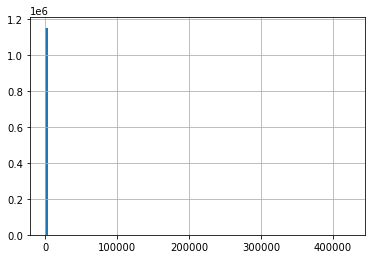

In [8]:
# check the distribution of the duration
df['duration_minutes'].hist(bins=100)

In [9]:
# let's find the shortest and longest trip
print('Shortest trip (in minutes):', df['duration_minutes'].min())
print('Longest trip: (in minutes)', df['duration_minutes'].max())

Shortest trip (in minutes): 0.016666666666666666
Longest trip: (in minutes) 423371.05


In [10]:
# filter out the trips that are shorter than 1 minute and longer than 60 minutes and make a separate copy of filtered data
df_filtered = df[(df['duration_minutes'] >= 1) &
                 (df['duration_minutes'] <= 60)].copy()

<AxesSubplot:>

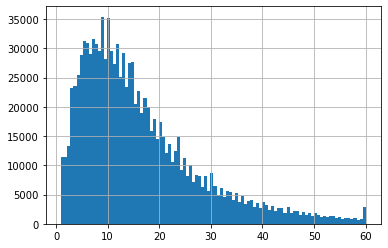

In [11]:
# check the distribution of the duration on filtered data
df_filtered['duration_minutes'].hist(bins=100)

In [12]:
# records count difference between original and filtered data
print('Count of records that are filtered out:', len(df) - len(df_filtered))

Count of records that are filtered out: 44286


### Question #3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

* 53%
* 63%
* 73%
* 83%

In [13]:
# answer to question #3

name_of_train_features = ['PUlocationID','DOlocationID']

# number of missing values in train columns
for column_name in name_of_train_features:
    # replace missing values with -1
    df_filtered[column_name].fillna(-1, inplace=True)
    # number of values filled with -1
    missing_vals_fraction = len(df_filtered[df_filtered[column_name] == -1]) / len(df_filtered) * 100
    print(f'Number of missing values filled with -1 in "{column_name}" column: {missing_vals_fraction:.2f}%')

Number of missing values filled with -1 in "PUlocationID" column: 83.53%
Number of missing values filled with -1 in "DOlocationID" column: 13.33%


Therefore the forth choice (__83%__) is the right answer.

### Question #4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).

* 2
* 152
* 352
* 525
* 725

__Answer:__ The question asks us to apply one-hot encoding to the pickup and dropoff location IDs. In order to achieve this goal using the dictionary vectorizer, we need to make sure that these two columns are of _string_ type. In another words, if the type of these two columns is not of string type, we'll need to convert them to string before applying the one-hot encoding through the dictionary vectorizer.

In [14]:
df_filtered.dtypes

dispatching_base_num               object
pickup_datetime            datetime64[ns]
dropOff_datetime           datetime64[ns]
PUlocationID                      float64
DOlocationID                      float64
SR_Flag                            object
Affiliated_base_number             object
duration                  timedelta64[ns]
duration_minutes                  float64
dtype: object

As we can see from the above, `PUlocationID` and `DOlocationID` are of float type. So, we'll need to convert them to string type before applying the one-hot encoding.

In [15]:
df_filtered[name_of_train_features] = df_filtered[name_of_train_features].astype('str')

df_filtered.dtypes

dispatching_base_num               object
pickup_datetime            datetime64[ns]
dropOff_datetime           datetime64[ns]
PUlocationID                       object
DOlocationID                       object
SR_Flag                            object
Affiliated_base_number             object
duration                  timedelta64[ns]
duration_minutes                  float64
dtype: object

Great. Now we can go ahead with one-hot encoding:

In [16]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()

train_dicts = df_filtered[name_of_train_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

X_train.shape

(1109826, 525)

In [17]:
print('Dimensionality of train matrix (number of feature columns):', len(dv.get_feature_names_out()))

Dimensionality of train matrix (number of feature columns): 525


### Question #5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 5.52
* 10.52
* 15.52
* 20.52

In [18]:
# answer to question #5

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


name_of_target_column = 'duration_minutes'
y_train = df_filtered[name_of_target_column].to_numpy()

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE on train data: {rmse_train:.3f}')

RMSE on train data: 10.529


### Question #6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021). 

What's the RMSE on validation?

* 6.01
* 11.01
* 16.01
* 21.01

__Answer:__ First of all, we'll define couple of functions that wraps up the preprocessing steps we saw earlier for any given data with similar structure. I'm going to repeat the import statements, as well as reading data and retraining just to make sure that the entire cells below could be used and executed independently, if copied to somewhere else:

In [19]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from typing import Optional, Tuple

In [20]:
def prepare_dataframe(file_path: str) -> pd.DataFrame:
    """
    Reads NYC Taxi FHVT data from a given file path and prepares it for feature engineering.

    Args:
        - file_path (str): Complete path to parquet data file

    Returns:
        pd.DataFrame: DataFrame with prepared data
    """

    # read parquet file data
    df = pd.read_parquet(file_path)

    # create duration column and fill it with computed duration of a trip
    df['duration'] = df['dropOff_datetime'] - df['pickup_datetime']
    # create target column and fill it with trip duration in minutes
    df['duration_minutes'] = df['duration'].apply(lambda x: x.total_seconds() / 60)

    # filter out the trips that are shorter than 1 minute and longer than 60 minutes
    df = df[(df['duration_minutes'] >= 1) &
            (df['duration_minutes'] <= 60)]

    # handle missing values by replacing them with -1 in pickup and dropoff location ID columns
    df['PUlocationID'].fillna(-1, inplace=True)
    df['DOlocationID'].fillna(-1, inplace=True)

    # convert intended categorical columns (pickup/dropoff location IDs here) to string object type, in order to prepare them for one-hot encoding
    name_of_intended_columns = ['PUlocationID', 'DOlocationID']
    df[name_of_intended_columns] = df[name_of_intended_columns].astype('str')

    return df

In [21]:
def prepare_features(df: pd.DataFrame, dv: Optional[DictVectorizer]=None) -> tuple:
    """
    Creates features from a NYC Taxi FHVT dataframe for modeling.

    Args:
        - df (pd.DataFrame): DataFrame with prepared data
        - dv (DictVectorizer, optional): DictVectorizer object to use for one-hot encoding;
          if not provided, a new one will be created and returned => this triggers train mode for feature engineering and treats data as training (applies 'fit_transform' on them);
          the presence of a DV object in the function call results in validation/test mode for feature engineering (only 'transform' is applied on data using the the provided DV object)

    Returns:
        tuple containing:
        - X_data (np.ndarray): Features matrix
        - y_data (np.ndarray): Target vector
        - dv (DictVectorizer): DictVectorizer object used for one-hot encoding
    """

    # if DictVectorizer object is not provided, create one => train mode is triggered
    # otherwise, use the provided DV object => validation/test mode is triggered
    if dv is None:
        dv = DictVectorizer()
        train_mode_enabled = True
    else:
        train_mode_enabled = False

    # create features for modeling
    columns_to_onehot_encode = ['PUlocationID', 'DOlocationID']
    feature_dicts = df[columns_to_onehot_encode].to_dict(orient='records')
    if train_mode_enabled:
        X_data = dv.fit_transform(feature_dicts)
    else:
        X_data = dv.transform(feature_dicts)

    # create target vector
    y_data = df['duration_minutes'].to_numpy()

    return (X_data, y_data, dv)

Ok, the imports and function definitions are done. Let's continue and put together the code required to train the model and evaluate it on validation dataset. I have placed the code in separated cells in a step-wise manner, to make further investigations on objects easier.

In [22]:
DATA_PATH = './data'

# read train and validation data and prepare corresponding dataframes
df_train      = prepare_dataframe(f'{DATA_PATH}/fhv_tripdata_2021-01.parquet')
df_validation = prepare_dataframe(f'{DATA_PATH}/fhv_tripdata_2021-02.parquet')

In [23]:
# prepare features for modeling
X_train, y_train, dv = prepare_features(df_train)

# notice the difference between train and validation preparation function call arguments (passing DictVectorizer object obtained from train data in order to prepare validation features)
X_validation, y_validation, _ = prepare_features(df_validation, dv)

In [24]:
# create the linear regression model and fit it to the training data
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# make predictions on the train data and compute RMSE
# note that we should get the same RMSE value as in the previous exercise (Question #5)
y_pred_train = model_lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print(f'RMSE on train data: {rmse_train:.3f}')

RMSE on train data: 10.529


In [25]:
# make predictions on the validation data and compute RMSE
y_pred_validation = model_lr.predict(X_validation)
rmse_validation = mean_squared_error(y_validation, y_pred_validation, squared=False)
print(f'RMSE on validation data: {rmse_validation:.3f}')

RMSE on validation data: 11.014


There you go. We get __11.014__ as the RMSE value on validation dataset.